In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decomposition import PCA, FisherLDA
from dataset import Dataset
from bayes_classifier import LDA
from metrics import calculate_accuracy
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(2)

# PCA

## 1. Load facial images and organize the data into a DataFrame.

In [3]:
path = r".\jaffe"
size = (64, 64)
dataset = Dataset(path, size)
dataset.load_data()

## 2&3. Resize and Flatten

In [4]:
X = dataset.resize()
le = LabelEncoder()
y = le.fit_transform(dataset.data["Class"].values)

## 4. Calculate the mean

In [5]:
mean = np.mean(X, axis=0)
X_normalized = X - mean

In [6]:
labels = np.unique(dataset.data["Class"])

## 5. Randomly select one image from each class

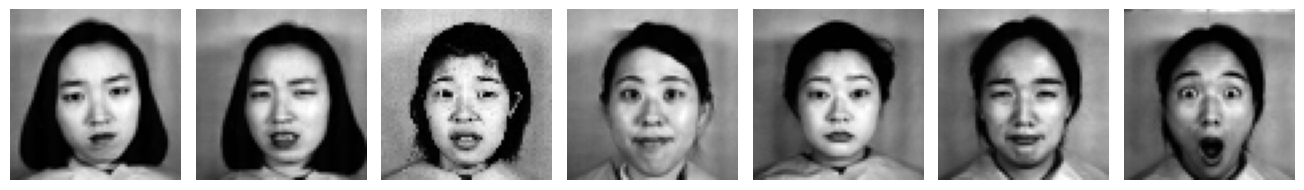

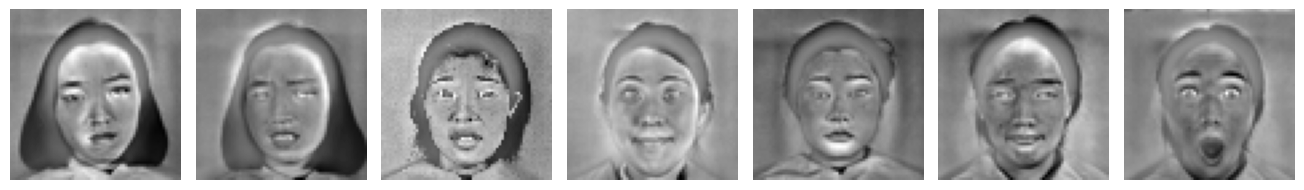

In [19]:
idxs = []
for i, label in enumerate(labels):
    idx = dataset.data[dataset.data["Class"] == label].sample(1).index[0]
    idxs.append(idx)

fig = plt.figure(figsize=(15, 4))
for i, idx in enumerate(idxs):
    plt.subplot(2, 8, i + 1)
    plt.imshow(X[idx].reshape((64, 64)), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 4))
for i, idx in enumerate(idxs):
    plt.subplot(2, 8, i + 1)
    plt.imshow(X_normalized[idx].reshape((64, 64)), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

## 6&7&8

In [20]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X)
x_transform = pca.transform(X)

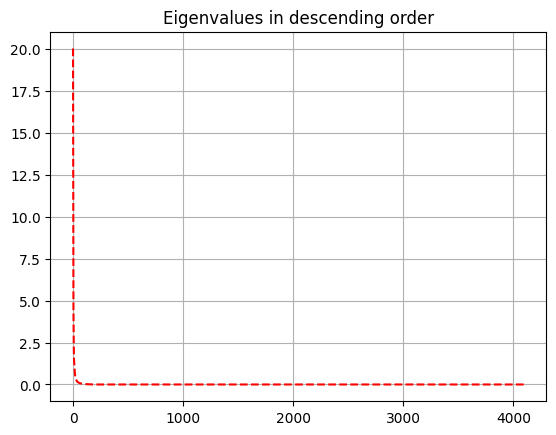

In [23]:
eignvalues = pca.eigenvalues
plt.plot(np.sort(eignvalues)[::-1], linestyle="--", color="red")
plt.grid()
plt.title("Eigenvalues in descending order")
plt.show()

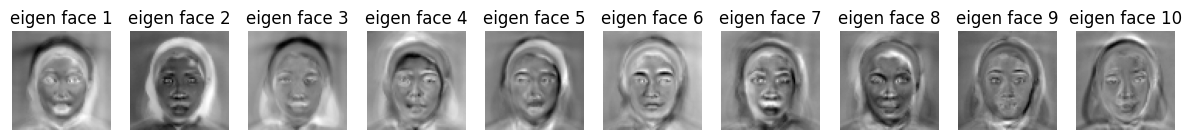

In [24]:
components = pca.components
fig = plt.figure(figsize=(15, 4))
for i, component in enumerate(components):
    plt.subplot(1, 10, i + 1)
    plt.imshow(component.reshape(size), cmap="gray")
    plt.axis("off")
    plt.title(f"eigen face {i + 1}",loc="center")
plt.show()

## 9. Project the images onto a lower-dimensional subspace (2D and 3D)

In [25]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(X)
x_transform = pca.transform(X)

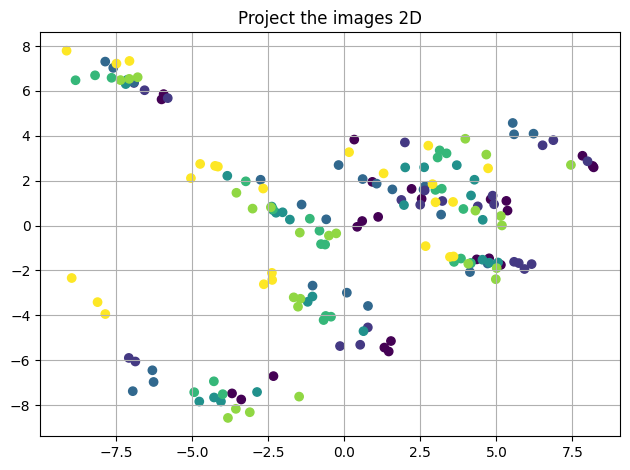

In [26]:
plt.scatter(x_transform[:, 0], x_transform[:, 1], c=y)
plt.grid()
plt.title("Project the images 2D")
plt.tight_layout()
plt.show()

In [27]:
n_components = 3
pca = PCA(n_components=n_components)
pca.fit(X)
x_transform = pca.transform(X)

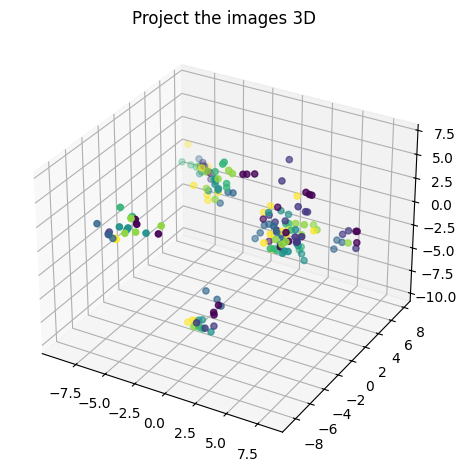

In [28]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x_transform[:, 0], x_transform[:, 1], x_transform[:, 2], c=y)
plt.grid()
plt.title("Project the images 3D")
plt.tight_layout()
plt.show()

## 10. Reconstruct the projected faces

In [10]:
n_components = 10
pca = PCA(n_components=n_components)
pca.fit(X)

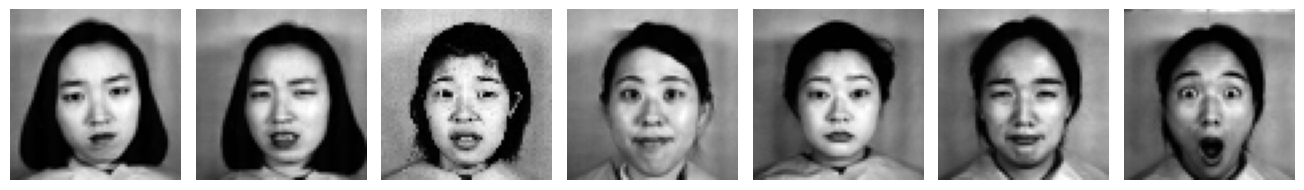

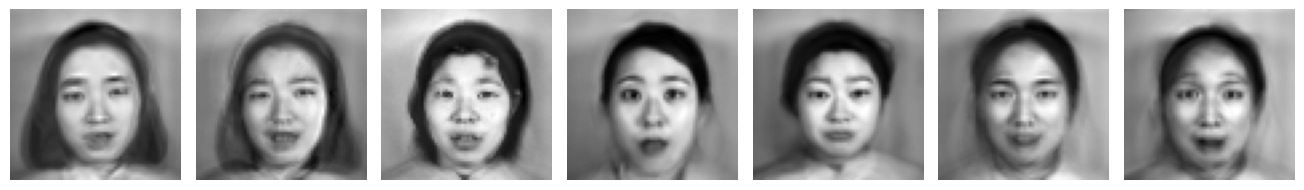

In [11]:
X_reconstruct = pca.reconstruct(X)

fig = plt.figure(figsize=(15, 4))

for i, idx in enumerate(idxs):

    plt.subplot(2, 8, i + 1)

    plt.imshow(X[idx].reshape((64, 64)), cmap="gray")
    plt.axis("off")

plt.tight_layout()

plt.show()


fig = plt.figure(figsize=(15, 4))

for i, idx in enumerate(idxs):

    plt.subplot(2, 8, i + 1)

    plt.imshow(X_reconstruct[idx].reshape((64, 64)), cmap="gray")
    plt.axis("off")

plt.tight_layout()

plt.show()

## 12&13. Keep 90% of the cumulative variance and Project

In [7]:
pca = PCA(0.9)
pca.fit(X)
X_transform = pca.transform(X)

In [8]:
PC = pca.explained_variance_
print(
    f"{len(PC)} principle components (PCs) are needed to keep 90% of the cumulative variance in data"
)

24 principle components (PCs) are needed to keep 90% of the cumulative variance in data


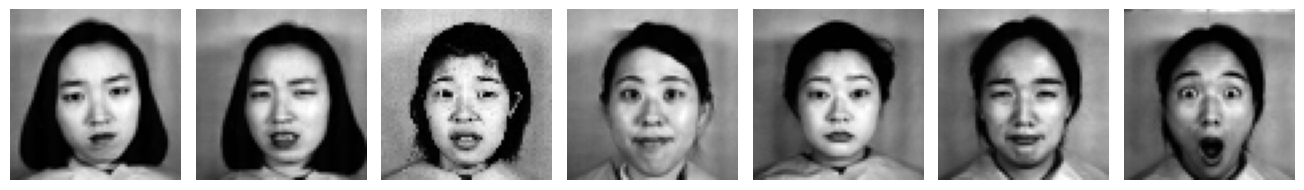

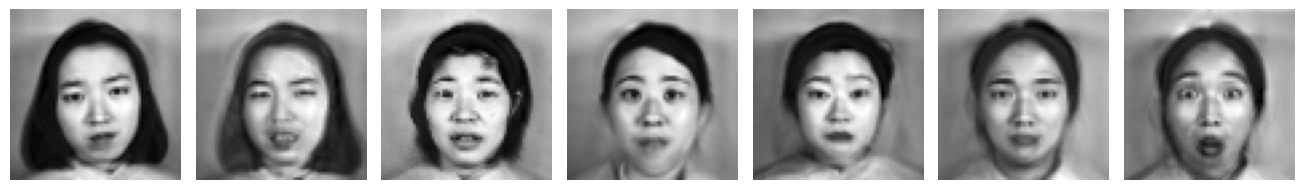

In [9]:
X_reconstruct = pca.reconstruct(X)
idxs = []
for i, label in enumerate(labels):
    idx = dataset.data[dataset.data["Class"] == label].sample(1).index[0]
    idxs.append(idx)

fig = plt.figure(figsize=(15, 4))
for i, idx in enumerate(idxs):
    plt.subplot(2, 8, i + 1)
    plt.imshow(X[idx].reshape((64, 64)), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(15, 4))
for i, idx in enumerate(idxs):
    plt.subplot(2, 8, i + 1)
    plt.imshow(X_reconstruct[idx].reshape((64, 64)), cmap="gray")
    plt.axis("off")
plt.tight_layout()
plt.show()

## 14. Split the projected data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transform, y, test_size=0.3, random_state=25
)

## 15. Apply a Bayes classifier

In [13]:
lda = LDA()
lda.fit(X_train, y_train)
lda_predictions_train = lda.predict(X_train)
lda_predictions_test = lda.predict(X_test)

In [14]:
accuracy = calculate_accuracy(y_train, lda_predictions_train)
print(f"The accuracy of LDA classifier on train is {accuracy * 100:.2f}%")
accuracy = calculate_accuracy(y_test, lda_predictions_test)
print(f"The accuracy of LDA classifier on test is {accuracy * 100:.2f}%")

The accuracy of LDA classifier on train is 82.35%
The accuracy of LDA classifier on test is 68.63%


## 16. (Bonus)

10 PC`s
25 PC`s
50 PC`s
100 PC`s
120 PC`s


d:\university\Pattern\HW04\HWIV\bayes_classifier.py:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance)), diff.T))


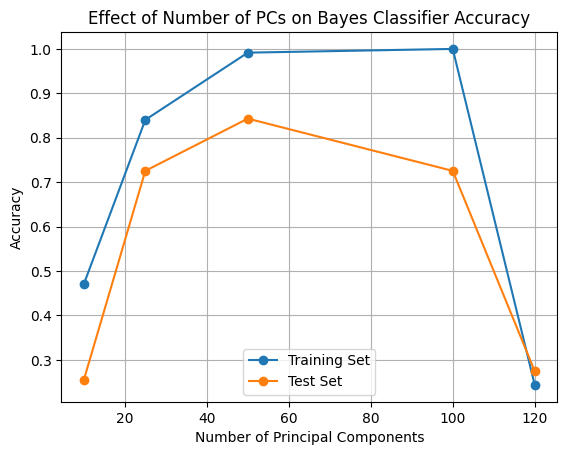

In [37]:
num_pcs_range = [10,25,50,100,120]

accuracy_train = []
accuracy_test = []

for n_components in num_pcs_range:
    print(f"{n_components} PC`s")
    pca = PCA(n_components=n_components)
    pca.fit(X)
    X_transform = pca.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_transform, y, test_size=0.3, random_state=25
    )

    lda = LDA()
    lda.fit(X_train, y_train)

    lda_predictions_train = lda.predict(X_train)
    lda_predictions_test = lda.predict(X_test)

    accuracy_train.append(calculate_accuracy(y_train, lda_predictions_train))
    accuracy_test.append(calculate_accuracy(y_test, lda_predictions_test))
    
plt.plot(num_pcs_range, accuracy_train, label="Training Set", marker="o")
plt.plot(num_pcs_range, accuracy_test, label="Test Set", marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Effect of Number of PCs on Bayes Classifier Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# 2. Fisher LDA

## 1.Load and resize

In [38]:
path = r".\jaffe"
size = (64, 64)
dataset = Dataset(path, size)
dataset.load_data()
X = dataset.resize()
le = LabelEncoder()
y = le.fit_transform(dataset.data["Class"].values)

## 2&3. Whiten and Calculate the separability matrix

In [39]:
fisherLDA = FisherLDA()
fisherLDA.fit(X,y)

## 4. Plot the eigen values

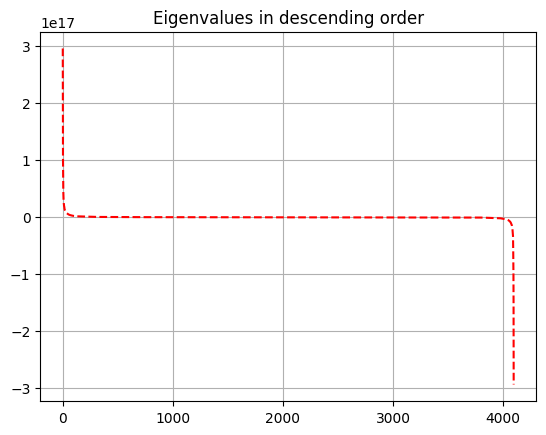

In [40]:
eignvalues = fisherLDA.eigenvalues
plt.plot(np.sort(eignvalues)[::-1], linestyle="--", color="red")
plt.grid()
plt.title("Eigenvalues in descending order")
plt.show()

## 5. Project the data

### 5.1 2D

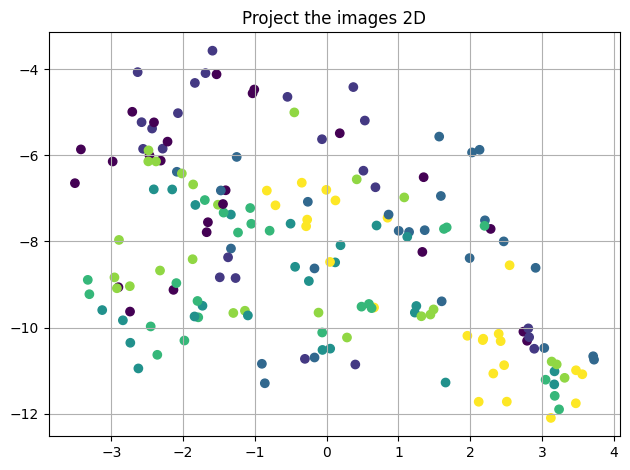

In [41]:
X_transform = fisherLDA.transform(X,2)
plt.scatter(X_transform[:, 0], X_transform[:, 1], c=y)
plt.grid()
plt.title("Project the images 2D")
plt.tight_layout()
plt.show()

### 5.2 3D

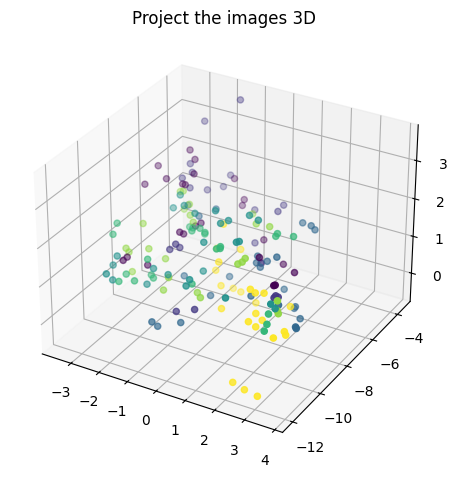

In [42]:
X_transform = fisherLDA.transform(X, 3)
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(X_transform[:, 0], X_transform[:, 1], X_transform[:, 2], c=y)
plt.grid()
plt.title("Project the images 3D")
plt.tight_layout()
plt.show()

## 6&7.Split the projected data and apply a Bayes classifier

In [43]:
X_transform = fisherLDA.transform(X,24)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transform, y, test_size=0.3, random_state=25
)

lda = LDA()
lda.fit(X_train, y_train)

lda_predictions_train = lda.predict(X_train)
lda_predictions_test = lda.predict(X_test)

In [45]:
accuracy = calculate_accuracy(y_train, lda_predictions_train)
print(f"The accuracy of LDA classifier on train is {accuracy * 100:.2f}%")
accuracy = calculate_accuracy(y_test, lda_predictions_test)
print(f"The accuracy of LDA classifier on test is {accuracy * 100:.2f}%")

The accuracy of LDA classifier on train is 93.28%
The accuracy of LDA classifier on test is 80.39%


## 8. (Bonus)

d:\university\Pattern\HW04\HWIV\bayes_classifier.py:7: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt(np.dot(np.dot(diff, np.linalg.inv(covariance)), diff.T))


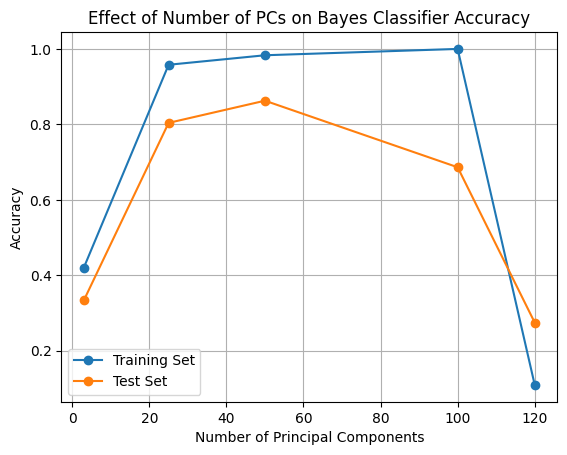

In [50]:
num_pcs_range = [3, 25, 50, 100, 120]

accuracy_train = []
accuracy_test = []

for n_components in num_pcs_range:
    X_transform = fisherLDA.transform(X, n_components)

    X_train, X_test, y_train, y_test = train_test_split(
        X_transform, y, test_size=0.3, random_state=25
    )

    lda = LDA()
    lda.fit(X_train, y_train)

    lda_predictions_train = lda.predict(X_train)
    lda_predictions_test = lda.predict(X_test)

    accuracy_train.append(calculate_accuracy(y_train, lda_predictions_train))
    accuracy_test.append(calculate_accuracy(y_test, lda_predictions_test))

plt.plot(num_pcs_range, accuracy_train, label="Training Set", marker="o")
plt.plot(num_pcs_range, accuracy_test, label="Test Set", marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Accuracy")
plt.title("Effect of Number of PCs on Bayes Classifier Accuracy")
plt.legend()
plt.grid(True)
plt.show()